### Hierarchical Clustering

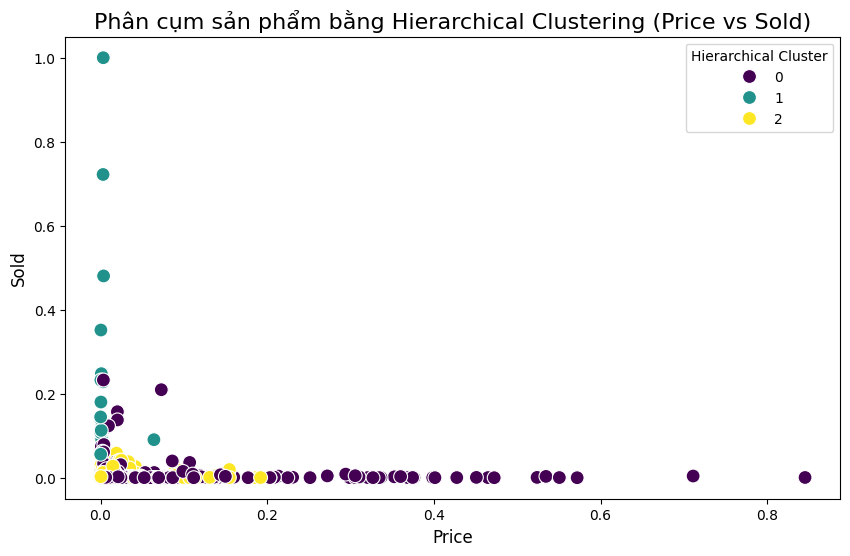

Sản phẩm bán chạy nhất trong từng cụm Hierarchical Clustering:
                                          product_name     price      sold  \
890  Giá Đỡ Laptop Nhôm Có Thể Gấp Gọn Dành Cho Mac...  0.003461  0.232648   
300  M1 Xách Tay Bluetooth Loa Âm Nhạc Stereo Surro...  0.003295  1.000000   
420  Ổ SSD HDD 2.5 ổ cứng SSD 120GB 240GB 1TB 512GB...  0.017787  0.059461   

     hierarchical_cluster  
890                     0  
300                     1  
420                     2  


In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Bước 1: Tải dữ liệu
train_data = pd.read_csv("../data/processed/train_data.csv")
selected_features = ['rating', 'comment_count', 'price', 'sold']
X = train_data[selected_features]

# Bước 2: Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Bước 3: Áp dụng mô hình Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)  # Sử dụng 3 cụm (có thể điều chỉnh)
train_data['hierarchical_cluster'] = hierarchical.fit_predict(X_scaled)

# Bước 4: Vẽ biểu đồ phân cụm (Price vs Sold)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x='price', y='sold', hue='hierarchical_cluster', palette='viridis', s=100)
plt.title('Phân cụm sản phẩm bằng Hierarchical Clustering (Price vs Sold)', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Sold', fontsize=12)
plt.legend(title='Hierarchical Cluster')
plt.show()

# Bước 5: Kết quả cụ thể của từng cụm
top_products = train_data.loc[train_data.groupby('hierarchical_cluster')['sold'].idxmax()]
print("Sản phẩm bán chạy nhất trong từng cụm Hierarchical Clustering:")
print(top_products[['product_name', 'price', 'sold', 'hierarchical_cluster']])
